In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import time as tt
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import read
import random
from gpinit import *


from waflgp import *
import utils 

In [2]:
#choose a random file (50 examples attached for the Reviewer's convenience)
random.seed(1)

i = np.random.randint(0, 49)
file1 = f'../free-spoken-digit-dataset-1.0.9/recordings/9_jackson_{i}.wav'
print(f'chosen file: {i}')
a1 = read(file1)
audio_tr = np.array(a1[1],dtype=float)
audio_tr = (audio_tr-np.mean(audio_tr))/np.std(audio_tr)

chosen file: 1


Text(0.5, 1.0, 'chosen audio file: 9_jackson_9.wav')

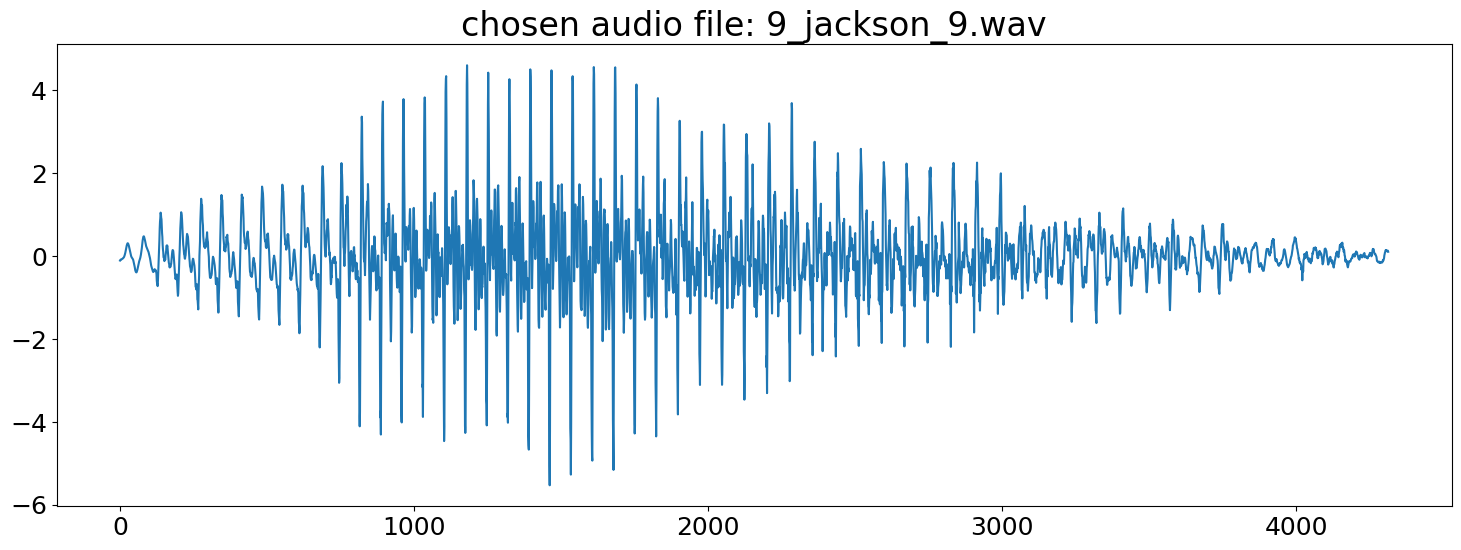

In [44]:
#plot file
plt.figure(figsize=(18,6))
plt.plot(audio_tr)

plt.title(f'chosen audio file: 9_jackson_{i}.wav')

##  10 components - spectral

Trained with spectral metric L1 in 5.806291103363037 seconds
Trained with spectral metric L2 in 6.020030975341797 seconds


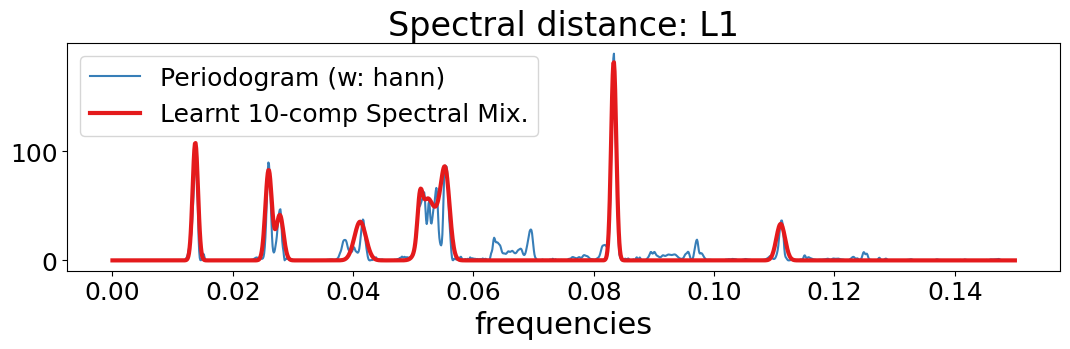

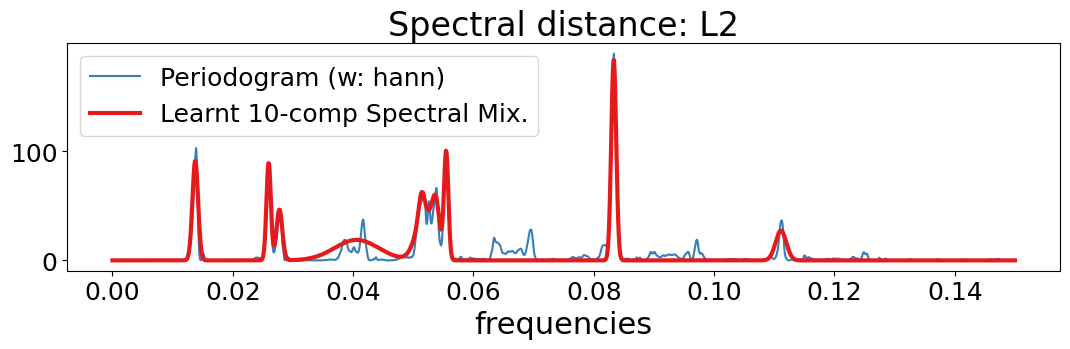

In [45]:
#train SLGP
q = 10
freqs = np.linspace(0,0.15,1500)
a_tr = audio_tr

for metric in ['L1','L2']:
    gp_f = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp_f.real_world = True #this removes the spectral floor
    gp_f.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_f.set_freqs(freqs)
    t0 = tt.time()
    gp_f.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)
    print(f'Trained with spectral metric {metric} in {tt.time() - t0} seconds')

    #plots
    gp_f.plot_psd(title = f'Spectral distance: {metric}')
    #plt.savefig(f'../TMLR2022/img/exp4_comparison_spectral-{metric}.pdf', bbox_inches='tight')



##  10 components - temporal

corrected
Trained with temporal metric L1 in 6.607302188873291 seconds
Trained with temporal metric L2 in 3.919265031814575 seconds


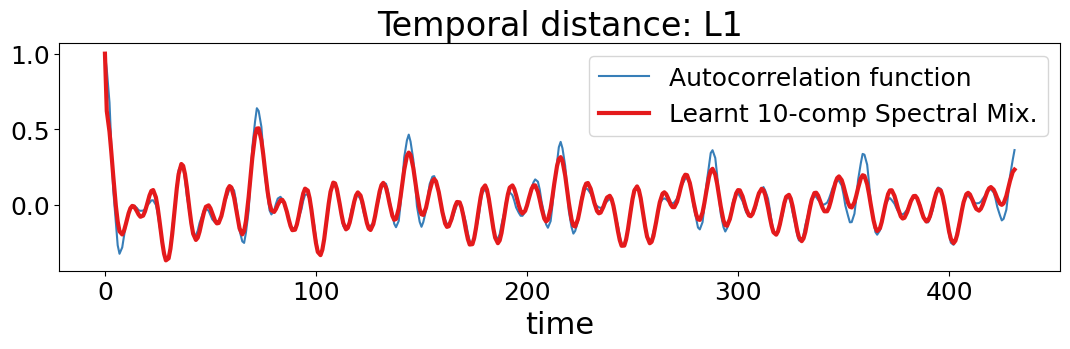

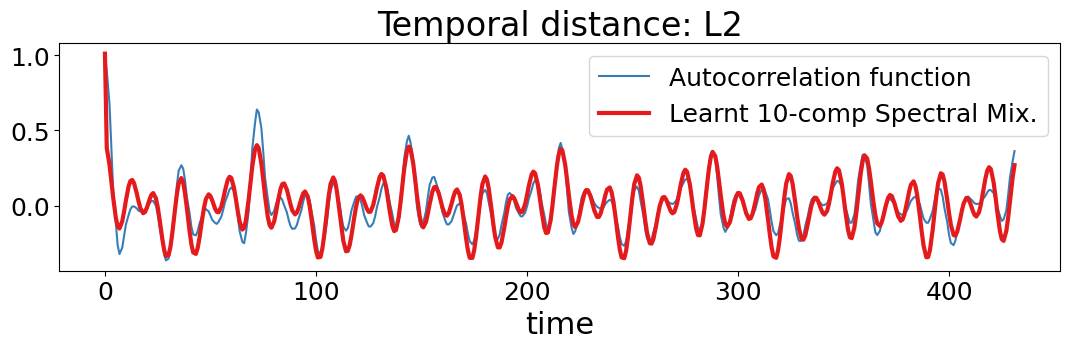

In [46]:
#train SLGP - in time
q = 10
audio_input = np.arange(len(a_tr))
audio_input = np.reshape(audio_input, (-1, 1))
from gpinit import *

freqs = np.linspace(0,0.2,2000)
a_tr = audio_tr

for metric in ['L1', 'L2']:
    gp_t = gpinit(space_input = audio_input, space_output=a_tr, aim = 'learning', kernel = 'qSM', order = q)
    gp_t.real_world = True #this removes the spectral floor
    gp_t.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_t.set_freqs(freqs)
    t0 = tt.time()
    gp_t.initialise(metric=metric)
    gp_t.compute_S()
    print(f'Trained with temporal metric {metric} in {tt.time() - t0} seconds')
    gp_t.plot_kernel(title = f'Temporal distance: {metric}')
    #plt.savefig(f'../TMLR2022/img/exp4_comparison_temporal-{metric}.pdf', bbox_inches='tight')




## performance vs model order

In [6]:
#train
a_tr = audio_tr
freqs = np.linspace(0,0.15,1500)
audio_input = np.arange(len(a_tr))
audio_input = np.reshape(audio_input, (-1, 1))


orders = []
times_temporal_L1 = []
times_temporal_L2 = []
times_spectral_L1 = []
times_spectral_L2 = []
times_spectral_W1 = []
times_spectral_W2 = []

loss_temporal_L1 = []
loss_temporal_L2 = []
loss_spectral_L1 = []
loss_spectral_L2 = []
loss_spectral_W1 = []
loss_spectral_W2 = []

for q in np.arange(1,21):
    orders.append(q)
    print(f'order is now: {q}')
    
    #spectral
    metric = 'L1'
    gp_f = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp_f.real_world = True #this removes the spectral floor
    gp_f.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_f.set_freqs(freqs)
    t0 = tt.time()
    gp_f.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)
    times_spectral_L1.append(tt.time() - t0)
    loss_spectral_L1.append(gp_f.final_loss)
    
    metric = 'L2'
    gp_f = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp_f.real_world = True #this removes the spectral floor
    gp_f.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_f.set_freqs(freqs)
    t0 = tt.time()
    gp_f.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)
    times_spectral_L2.append(tt.time() - t0)
    loss_spectral_L2.append(gp_f.final_loss)
    
    metric = 'W1'
    gp_f = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp_f.real_world = True #this removes the spectral floor
    gp_f.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_f.set_freqs(freqs)
    t0 = tt.time()
    gp_f.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)
    times_spectral_W1.append(tt.time() - t0)
    loss_spectral_W1.append(gp_f.final_loss)
    
    metric = 'W2'
    gp_f = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp_f.real_world = True #this removes the spectral floor
    gp_f.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_f.set_freqs(freqs)
    t0 = tt.time()
    gp_f.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)
    times_spectral_W2.append(tt.time() - t0)
    loss_spectral_W2.append(gp_f.final_loss)
    
    
    
    #temporal
    metric = 'L1'
    gp_t = gpinit(space_input = audio_input, space_output=a_tr, aim = 'learning', kernel = 'qSM', order = q)
    gp_t.real_world = True #this removes the spectral floor
    gp_t.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_t.set_freqs(freqs)
    t0 = tt.time()
    gp_t.initialise(metric=metric)
    times_temporal_L1.append(tt.time() - t0)
    loss_temporal_L1.append(gp_t.final_loss)
                            
    
    metric = 'L2'
    gp_t = gpinit(space_input = audio_input, space_output=a_tr, aim = 'learning', kernel = 'qSM', order = q)
    gp_t.real_world = True #this removes the spectral floor
    gp_t.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp_t.set_freqs(freqs)
    t0 = tt.time()
    gp_t.initialise(metric=metric)
    times_temporal_L2.append(tt.time() - t0)
    loss_temporal_L2.append(gp_t.final_loss)
    
    

order is now: 1
order is now: 2
corrected
corrected
order is now: 3
order is now: 4
corrected
order is now: 5
corrected
order is now: 6
order is now: 7
order is now: 8
order is now: 9
order is now: 10
order is now: 11
order is now: 12
order is now: 13
order is now: 14
order is now: 15
order is now: 16
corrected
order is now: 17
order is now: 18


/Users/felipe/Dropbox/Research/papers/2022 - Initialising GPs via covariance matching (in prep)/experiments/utils.py:18: RuntimeWarning: overflow encountered in double_scalars
  return sigma**2 * np.sqrt(np.pi/gamma) * np.exp(-(np.pi*(freqs-mu))**2/gamma)
/Users/felipe/Dropbox/Research/papers/2022 - Initialising GPs via covariance matching (in prep)/experiments/utils.py:18: RuntimeWarning: overflow encountered in true_divide
  return sigma**2 * np.sqrt(np.pi/gamma) * np.exp(-(np.pi*(freqs-mu))**2/gamma)
/Users/felipe/Dropbox/Research/papers/2022 - Initialising GPs via covariance matching (in prep)/experiments/utils.py:18: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * np.sqrt(np.pi/gamma) * np.exp(-(np.pi*(freqs-mu))**2/gamma)
/Users/felipe/Dropbox/Research/papers/2022 - Initialising GPs via covariance matching (in prep)/experiments/utils.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return sigma**2 * np.sqrt(np.pi/gamma) * np.exp(-(np

order is now: 19
order is now: 20


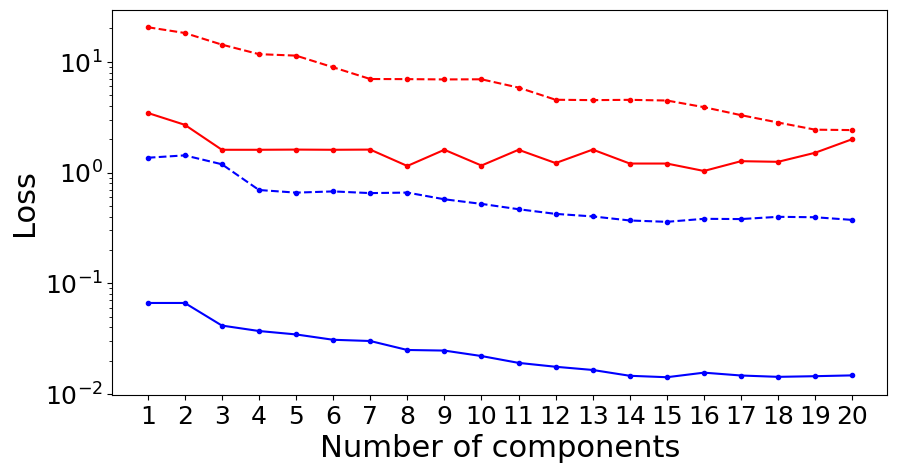

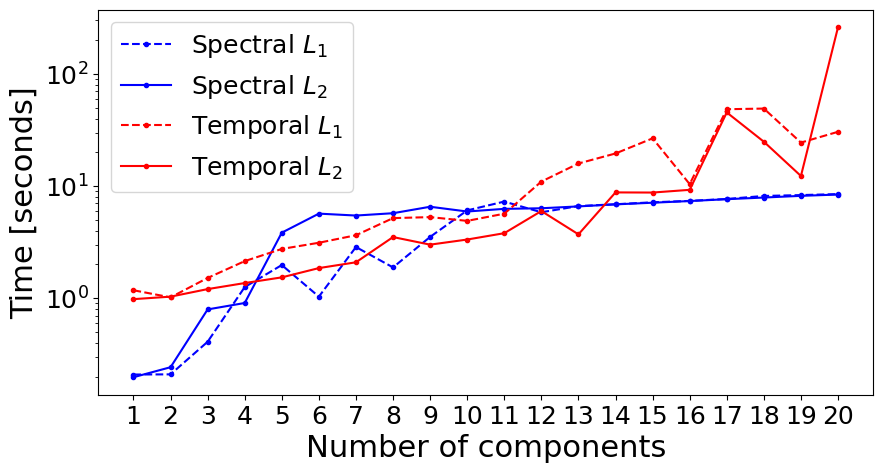

In [48]:
plt.figure(figsize=(10,5))
plt.semilogy(np.arange(1,21),loss_spectral_L1,'b.--', label = 'Spectral $L_1$')
plt.semilogy(np.arange(1,21),loss_spectral_L2,'b.-', label = 'Spectral $L_2$')
#plt.semilogy(np.arange(1,21),loss_spectral_W1, label = 'spectral_W1')
#plt.semilogy(np.arange(1,21),loss_spectral_W2, label = 'spectral_W2')
plt.semilogy(np.arange(1,21),loss_temporal_L1,'r.--', label = 'Temporal $L_1$')
plt.semilogy(np.arange(1,21),loss_temporal_L2,'r.-', label = 'Temporal $L_2$')
plt.xticks(np.arange(1,21))
plt.xlabel('Number of components')
plt.ylabel('Loss')
#plt.savefig('../TMLR2022/img/exp4_comparison_losses.pdf', bbox_inches='tight')


plt.figure(figsize=(10,5))
plt.semilogy(np.arange(1,21),times_spectral_L1,'b.--', label = 'Spectral $L_1$')
plt.semilogy(np.arange(1,21),times_spectral_L2,'b.-', label = 'Spectral $L_2$')
#plt.semilogy(np.arange(1,21),times_spectral_W1, label = 'spectral_W1')
#plt.semilogy(np.arange(1,21),times_spectral_W2, label = 'spectral_W2')
plt.semilogy(np.arange(1,21),times_temporal_L1, 'r.--', label = 'Temporal $L_1$')
plt.semilogy(np.arange(1,21),times_temporal_L2,'r.-', label = 'Temporal $L_2$')
plt.xticks(np.arange(1,21))
plt.xlabel('Number of components')
plt.ylabel('Time [seconds]')
plt.legend()
#plt.savefig('../TMLR2022/img/exp4_comparison_times.pdf', bbox_inches='tight')


In [47]:
len(a_tr)

4313